<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/LinearAndPolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving height-weight.csv to height-weight.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/height-weight.csv')

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Height')

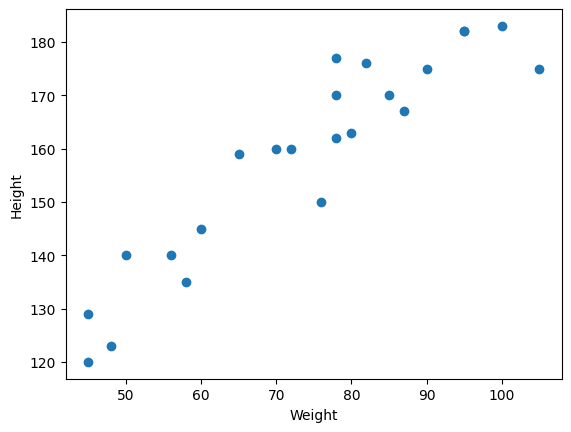

In [ ]:
# scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")


In [ ]:
# Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [ ]:
# Seaborn
import seaborn as sns

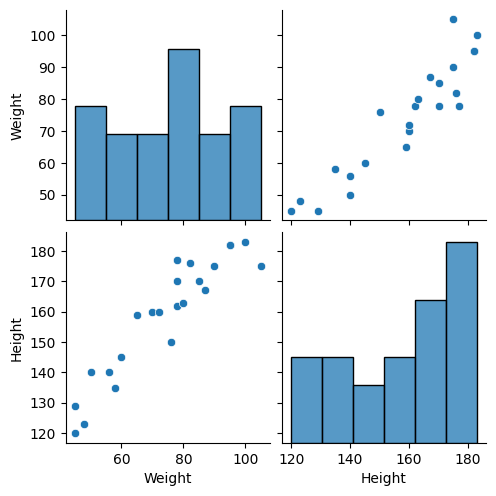

In [ ]:
sns.pairplot(df)

In [ ]:
# independent and dependent feature

In [ ]:
x = df[['Weight']]
# Independent features should be data frame or 2 dimensional array
y = df['Height']
# Dependent Features can be in series or 1D

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [ ]:
x_train.shape

(18, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
#standard deviation will be zero
# and mean will be 1

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.95702272],
       [ 1.84727641],
       [-0.44194737],
       [ 0.30205036],
       [ 0.70266452]])

In [ ]:
# Apply Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(x_test)

In [ ]:
print("Coefficient or Slope : ", regression.coef_)
print("Intercept : ", regression.intercept_)

Coefficient or Slope :  [19.27999806]
Intercept :  156.77777777777777


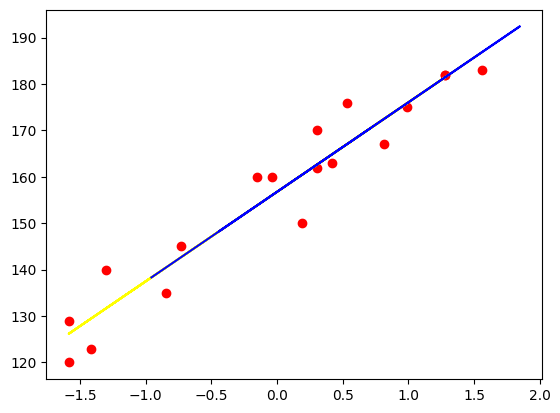

In [ ]:
# plot scattering
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regression.coef_ * x_train + regression.intercept_, color='yellow')
plt.plot(x_test, y_pred, color='blue')

In [ ]:
# performance metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

rmse = np.sqrt(mse)
print(rmse)

125.63319760080458
8.906737699780631
11.208621574520418


In [ ]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_test, y_pred)
print(r2Score)

0.3222205567500831


In [ ]:
# OLS Linear Regression
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train, x_train).fit()
y_pred = model.predict(x_test)
print(y_pred)

[-18.45139612  35.61548553  -8.52074439   5.82353034  13.54737057]


In [ ]:
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.98087363])

In [ ]:
df = pd.read_csv('/content/economic_index.csv')

In [ ]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
# drop unnecessary column
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis = 1, inplace=True)

In [ ]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [ ]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


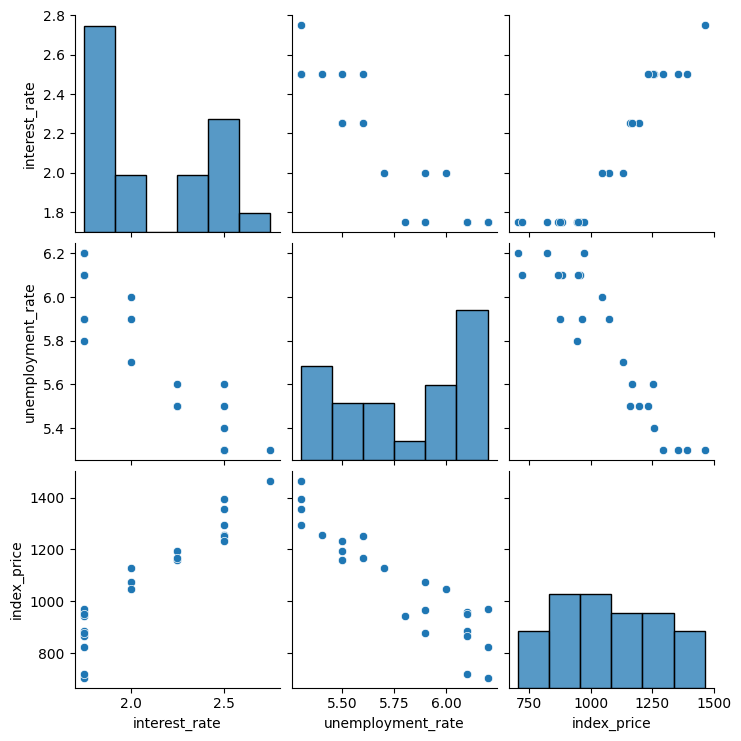

In [ ]:
# let's do some visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

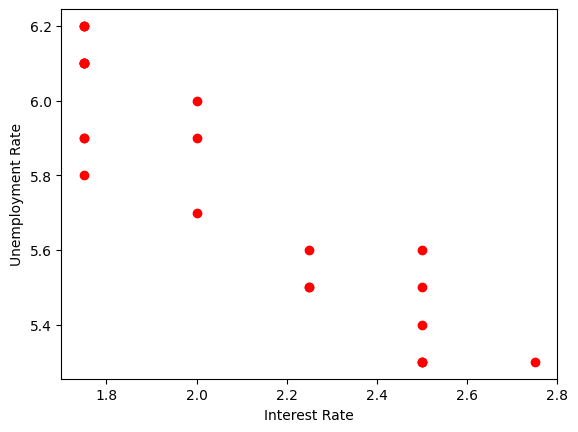

In [ ]:
# visualise the data points more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

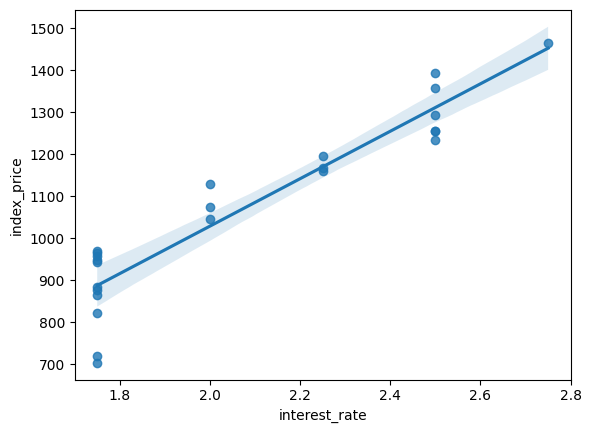

In [ ]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

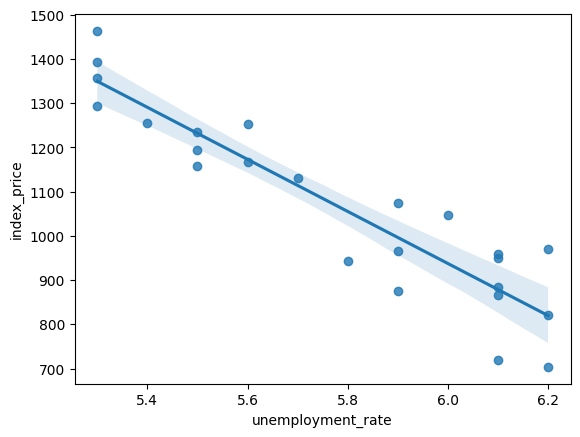

In [ ]:
sns.regplot(x=df['unemployment_rate'], y=df['index_price'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
validation_score = cross_val_score(regression,
                                   x_train,
                                   y_train,
                                   scoring='neg_mean_squared_error',
                                   cv=3)

In [ ]:
np.mean(validation_score)

np.float64(-5674.031667186763)

In [ ]:
# now i will do the prediction
y_pred = regression.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error : ", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error : ", rmse)


Mean Absolute Error :  6957.105303258833
Mean Absolute Error :  71.71878409976625
Root Mean Squared Error :  83.40926389351985


In [ ]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_test, y_pred)
print(r2Score)

0.8254940547158576


In [ ]:
adjusted_r2_score = (1 - (1-r2Score)*(len(y_test) - 1) / (len(y_test) - 2 - 1))
print(adjusted_r2_score)

0.6509881094317151


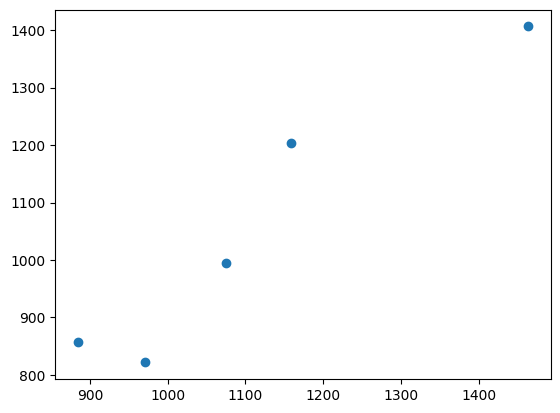

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
residuals = y_test - y_pred
print(residuals)

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64


/tmp/ipython-input-81-2998397011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

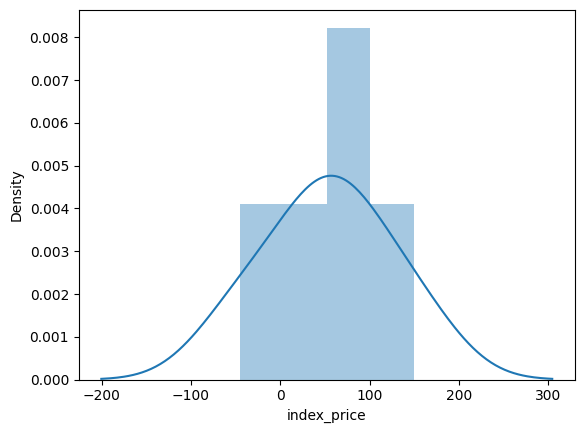

In [ ]:
sns.distplot(residuals, kde=True)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

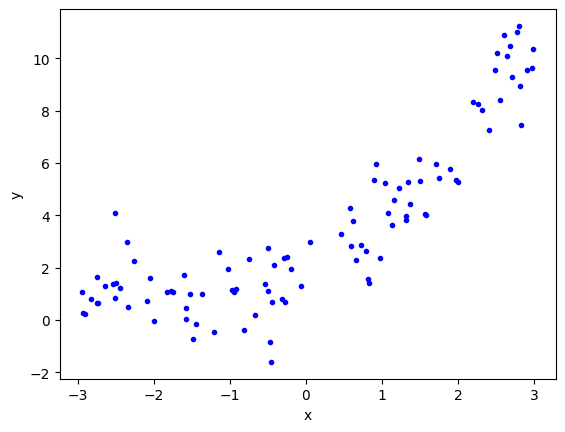

In [ ]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x** 2 + 1.5 * x + 2 + np.random.randn(100, 1)

plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# let's implement simple linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
sscore = r2_score(y_test, regression.predict(x_test))
print(sscore)

0.7246620153825564


Text(0, 0.5, 'y')

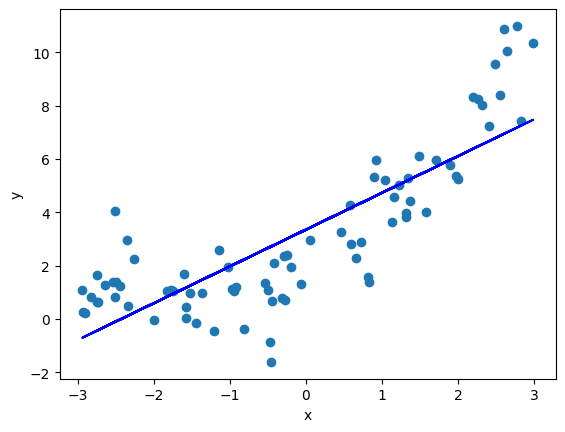

In [ ]:
plt.plot(x_train, regression.predict(x_train), 'b')
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9274798224792701


In [ ]:
print(regression.coef_)

[[0.         1.49223568 0.47498455]]


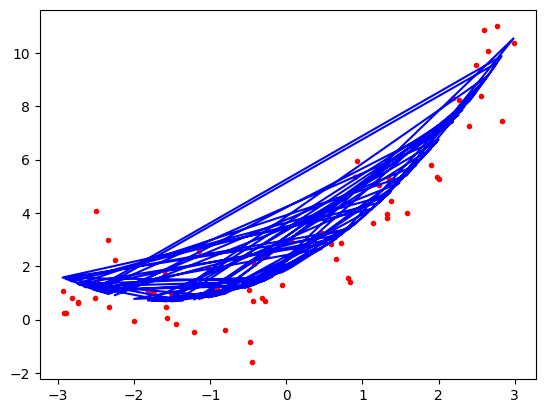

In [ ]:
plt.plot(x_train, y_train, 'r.')
plt.plot(x_train, regression.predict(x_train_poly), 'b-')

In [ ]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)

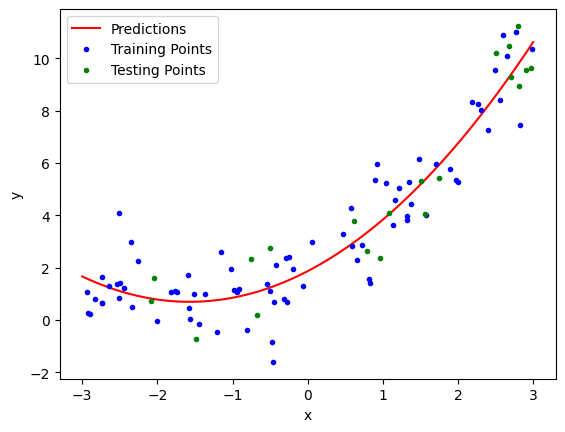

In [ ]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new, y_new, "r-", label="Predictions")
plt.plot(x_train, y_train, "b.", label="Training Points")
plt.plot(x_test, y_test, "g.", label="Testing Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# pipeline in polynomial
from sklearn.pipeline import Pipeline

In [ ]:
def polynomial_regression(degree):
  x_new = np.linspace(-3, 3, 200).reshape(200, 1)

  poly_features = PolynomialFeatures(degree=degree, include_bias=True)
  lin_regression = LinearRegression()
  poly_regression = Pipeline([
      ("poly_features", poly_features),
      ("lin_regression", lin_regression)
  ])

  poly_regression.fit(x_train, y_train)
  y_pred = poly_regression.predict(x_new)
  # plotting prediction line
  plt.plot(x_new, y_pred, 'r-', label="Degree " + str(degree))
  plt.plot(x_train, y_train, "b.")
  plt.plot(x_test, y_test, "g.")
  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")

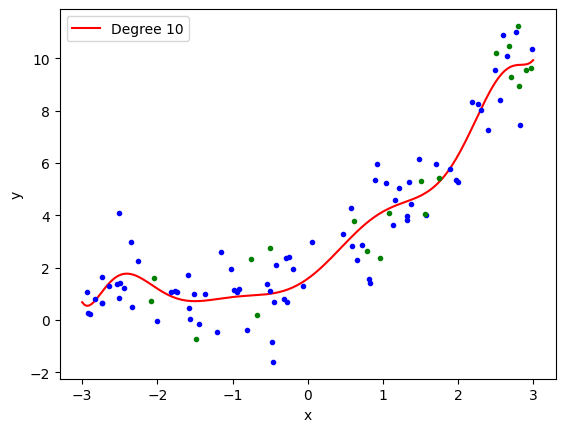

In [ ]:
polynomial_regression(10)